#### `What are CRM Analytics?`

CRM analytics are data that demonstrate your company’s sales and customer service performance. CRM analytics also presents customer data that you can use to inform smarter business decisions. Typically, you’ll use CRM software to obtain CRM analytics and automate all your data collection and report generation.

#### `Benefits of CRM Analysis`

The primary benefit of CRM analysis is that you can use it to inform your sales, customer service and marketing processes. You can use your CRM analytics to improve your methods via:

* **Customer service evaluations.** CRM analytics fill you in on your customer service team’s performance. If you see figures that your team could improve, implement practices that push your team toward these goals.
* **Accurate customer data.** Whether you’re using your customer data for demographic marketing or email marketing, you need to know whether you’re reaching the right person. CRM analysis ensures you’re doing just that.
* **Thorough customer analytics.** How much does your customer usually spend per quarter with you? Are they buying the same products time and time again, or does it vary? With CRM analytics, you’ll get firm answers to these questions, and you can use what you learn to refine your marketing strategies.
* **Efficient lead generation.** Your CRM analysis can tell you which of your marketing efforts most strongly correlate to purchases. If you see one approach correlating strongly to purchases but have only targeted a sliver of your customers with that approach, try that method more – your sales might increase.

### Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.graph_objects as pg
from plotly.offline import iplot
import datetime as dt
import squarify
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from operator import attrgetter

### Load and check data

In [71]:
df = pd.read_csv("data.csv", header=0, dtype= {'CustomerID' : str, 'InvoiveID' :  str}, encoding='unicode_escape',
                    parse_dates=["InvoiceDate"], infer_datetime_format=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### Understanding Data

####   `Context`

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

#### `Variable Description`

* **InvoiceNo**: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
* **StockCode**: Product code that consists 5 digits.
* **Description**: Product name.
* **Quantity**: The quantities of each product per transaction.
* **InvoiceDate**: Represents the day and time when each transaction was generated.
* **UnitPrice**: Product price per unit.
* **CustomerID**: Customer number that consists 5 digits. Each customer has a unique customer ID.
* **Country**: Name of the country where each customer resides.

In [72]:
def check_data(dataframe, head=5):
    '''
        The basic function of the check data function is to print the:
        shape, rows, columns, types, head, tail, missing values, duplicated values, and quantiles 
        in a structured format.
    '''
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_data(df)

------------------------------- SHAPE --------------------------------
Rows: 541909
Columns: 8
------------------------------- TYPES --------------------------------
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object
-------------------------------- HEAD --------------------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 0

In [73]:
world_map = df[['CustomerID', 'InvoiceNo', 'Country']
              ].groupby(['CustomerID', 'InvoiceNo', 'Country']
                       ).count().reset_index(drop = False)
countries = world_map["Country"].value_counts()

data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names',
            z = countries,
            text = countries.index,
            colorbar = {'title':'Orders'},
            colorscale='Viridis',
            reversescale = False)

layout = dict(title={'text': "Number of Orders by Countries",
                     'y':0.9,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              geo = dict(resolution = 50,
                         showocean = True,
                         oceancolor = "LightBlue",
                         showland = True,
                         landcolor = "whitesmoke",
                         showframe = True),
             template = 'plotly_white',
             height = 600,
             width = 1000)

choromap = pg.Figure(data = [data], layout = layout)
iplot(choromap, validate = False)


### Descriptive Statistics

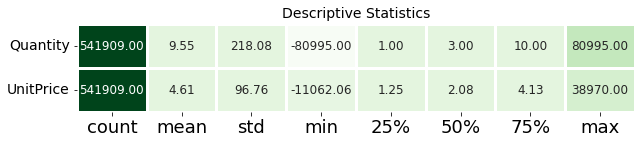

In [74]:
def desc_stats(dataframe):
    desc_df = pd.DataFrame(index= dataframe.columns, 
                           columns= dataframe.describe().T.columns,
                           data= dataframe.describe().T)
    
    f,ax = plt.subplots(figsize=(10,
                                 desc_df.shape[0] * 0.81))
    sns.heatmap(desc_df,
                annot = True,
                cmap = "Greens",
                fmt = '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.1,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 18)
    plt.yticks(size = 14,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(df.select_dtypes(include = [float, int]))

<AxesSubplot:>

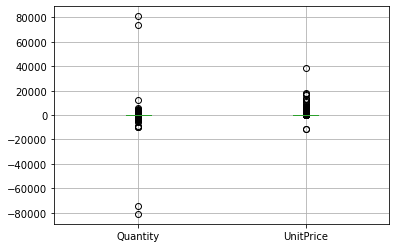

In [75]:
df.boxplot()

* 📌 It is clearly seems that there are ouliters in Quantity and UnitPrice that have to be handled
* 📌 There are negative values in UnitPrice and Quantity because of cancelled orders.
* 📌 Missing values in Customer ID and Description.
* 📌 Quantity and Unit Price should be multiplied in order to create Total Price.

### Data Cleaning

In [76]:
def replace_with_thresholds(dataframe, col, q1=0.25, q3=0.75):
    '''
        Performs Capping on the outliers: 
        which is to replace the outliers values with the lower and upper thresholds.
        
        Args:

        dataframe -> it contains the all the data
        col -> it is the col of the dataframe for which we are performing capping
        q1 -> it is the first quantile which has default value
        q3 ->  it is the third quantile 

        return:

        dataframe 
    '''
    d = dataframe.copy()
    quantile1 = d[col].quantile(q1)
    quantile3 = d[col].quantile(q3)
    iqr = quantile3 - quantile1
    lower = quantile1 - 1.5*iqr
    upper = quantile3 + 1.5*iqr

    d.loc[(d[col] < lower), col] = lower
    d.loc[(d[col] > upper), col] = upper

    return d

def ecommerce_preprocess(dataframe):
    '''
        Performs some Cleaning on the dataframe by:
        * removing records which contains null values
        * removing cancel orders records
        * removing records which have negative quantity values
        * handling outliers
        * creating a total price column from quantity and unit price.
    '''
    df_ = dataframe.copy()
    
    #Missing Values
    df_ = df_.dropna()
    
    #Cancelled Orders & Quantity
    df_ = df_[~df_['InvoiceNo'].str.contains('C', na = False)]
    df_ = df_[df_['Quantity'] > 0]
    
    #Replacing Outliers
    df_ = replace_with_thresholds(df_, "Quantity")
    df_ = replace_with_thresholds(df_, "UnitPrice")
    
    #Total Price
    df_["TotalPrice"] = df_["Quantity"] * df_["UnitPrice"]
    
    return df_



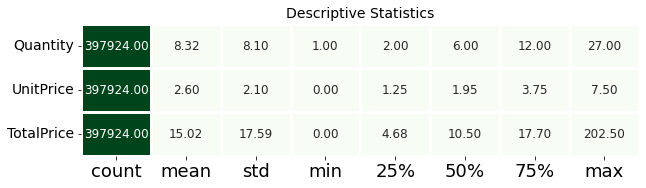

In [77]:
# calling above function 
df = ecommerce_preprocess(df)

# checking descriptive statistics again after cleaning
desc_stats(df.select_dtypes(include = [float,int]))

### RFM Analysis

RFM stands for **Recency**, **Frequency**, and **Monetary** value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

RFM factors illustrate these facts:

* The more recent the purchase, the more responsive the customer is to promotions
* The more frequently the customer buys, the more engaged and satisfied they are
* Monetary value differentiates heavy spenders from low-value purchasers

### RFM Metrics

In [78]:
# selecting as a current date 
today_date = dt.datetime(2011,12,11) 

# evaluating the recency, frequency and monetary values of the customers
rfm = df.groupby("CustomerID").agg({'InvoiceDate' : lambda x : (today_date - x.max()).days,
                                    'InvoiceNo' : lambda x: x.nunique(),
                                    'TotalPrice' : lambda x: x.sum()})
rfm.columns = ["Recency","Frequency","Monetary"]
rfm["Monetary"] = rfm["Monetary"][rfm["Monetary"] > 0] 
rfm = rfm.reset_index()

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,28.08
1,12347,3,7,3877.44
2,12348,76,4,557.57
3,12349,19,1,1336.65
4,12350,311,1,301.90


### RFM Scores

In [79]:
def get_rfm_scores(dataframe):
    
    df_ = dataframe.copy()
    df_['recency_score'] = pd.qcut(df_['Recency'],5,labels=[5, 4, 3, 2, 1])
    df_['frequency_score'] = pd.qcut(df_['Frequency'].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])
    df_['monetary_score'] = pd.qcut(df_['Monetary'], 5, labels = [1, 2, 3, 4, 5])
    df_['RFM_SCORE'] = (df_['recency_score'].astype(str) + df_['frequency_score'].astype(str))
    
    return df_

rfm = get_rfm_scores(rfm)

### Segmentation

In [80]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm["segment"] = rfm["RFM_SCORE"].replace(seg_map, regex = True)

### Segmentation Map

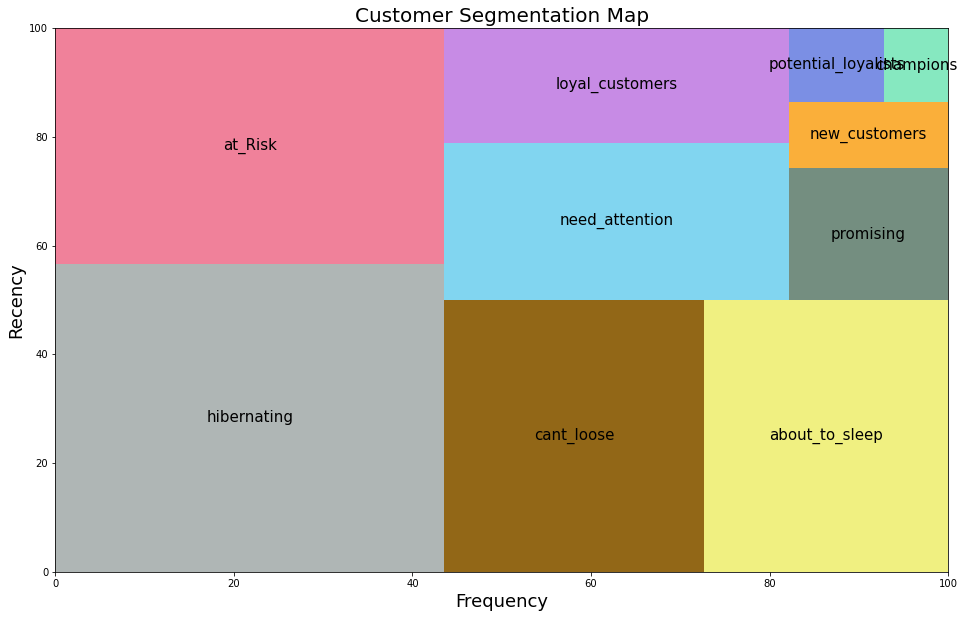

In [81]:
segments = rfm['segment'].value_counts().sort_values(ascending = False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(sizes=segments,
              label=[label for label in seg_map.values()],
              color=['#AFB6B5', '#F0819A', '#926717', '#F0F081', '#81D5F0',
                     '#C78BE5', '#748E80', '#FAAF3A', '#7B8FE4', '#86E8C0'],
              pad = False,
              bar_kwargs = {'alpha': 1},
              text_kwargs = {'fontsize':15})
plt.title("Customer Segmentation Map", fontsize = 20)
plt.xlabel('Frequency', fontsize = 18)
plt.ylabel('Recency', fontsize = 18)
plt.show()

### Segmentation Model or Clustering Validation

In [82]:
x = rfm[["recency_score","frequency_score"]]
labels = rfm["segment"]
print("Number of Observations : ", len(rfm))
print("Number of Labels : ", len(labels.unique()))
print("Silhouette Score : ", round(silhouette_score(x, labels), 3))
print("Calinski Harabasz Score : ", round(calinski_harabasz_score(x, labels), 3))
print("Davies Bouldin Score :", round(davies_bouldin_score(x, labels), 3))

Number of Observations :  4339
Number of Labels :  10
Silhouette Score :  0.471
Calinski Harabasz Score :  4591.503
Davies Bouldin Score : 0.633


According to the clustering metrics:
* data points are in their right clusters

### Descriptive Statistics Analysis of the Segments

In [83]:
rfm[["Recency","Frequency","Monetary","segment"]].groupby("segment").agg({'mean', 'min', 'max', 'std'})

Recency                       Frequency       \
                           std  max        mean min        std  max   
segment                                                               
about_to_sleep       10.943474   72   53.312500  34   0.368913    2   
at_Risk              68.618828  374  153.785835  73   0.954415    6   
cant_loose           65.250378  373  132.968254  73   4.289630   34   
champions             3.683300   13    6.361769   1  16.476484  210   
hibernating          92.013560  374  217.605042  73   0.302492    2   
loyal_customers      15.577050   72   33.608059  15   4.545669   63   
need_attention       11.552074   72   52.427807  34   0.470081    3   
new_customers         3.902112   13    7.428571   1   0.000000    1   
potential_loyalists   9.338808   33   17.398760   1   0.651401    3   
promising             5.238115   33   23.421053  15   0.000000    1   

                                       Monetary                          \
                          mean min          std        max         mean   
segment                                                                   
about_to_sleep        1.161932   1   436.308654    5161.70   404.479631   
at_Risk               2.878583   2   671.393276    6422.46   765.064167   
cant_loose            8.380952   6  1247.134329    5688.50  1880.056667   
champions            12.417062   3  7969.534207  113703.10  4260.126209   
hibernating           1.101774   1   387.132758    4649.37   327.195063   
loyal_customers       6.479853   3  2299.413384   36875.01  2140.062639   
need_attention        2.326203   2   653.447800    4088.55   760.681979   
new_customers         1.000000   1   148.974004     790.35   264.912381   
potential_loyalists   2.010331   1   531.628901    4401.39   593.880393   
promising             1.000000   1   198.011593    1336.65   248.873830   

                             
                        min  
segment                      
about_to_sleep         6.20  
at_Risk               13.23  
cant_loose            55.67  
champions            152.42  
hibernating            3.75  
loyal_customers       34.56  
need_attention         6.90  
new_customers         74.25  
potential_loyalists    7.83  
promising             30.00

### Number of Customers by segments

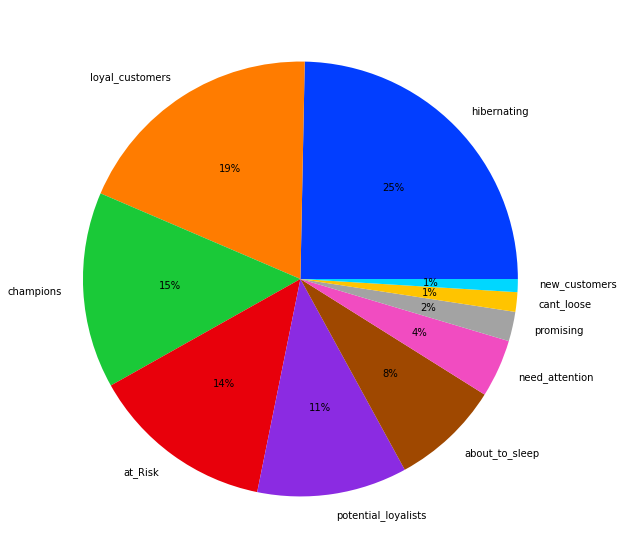

In [84]:
plt.figure(figsize=(10,10))
plt.pie(rfm["segment"].value_counts(), labels=rfm["segment"].value_counts().index, 
            autopct="%.0f%%", colors= sns.color_palette("bright"))
plt.show()

### Recency & Frequency Plot by Segments

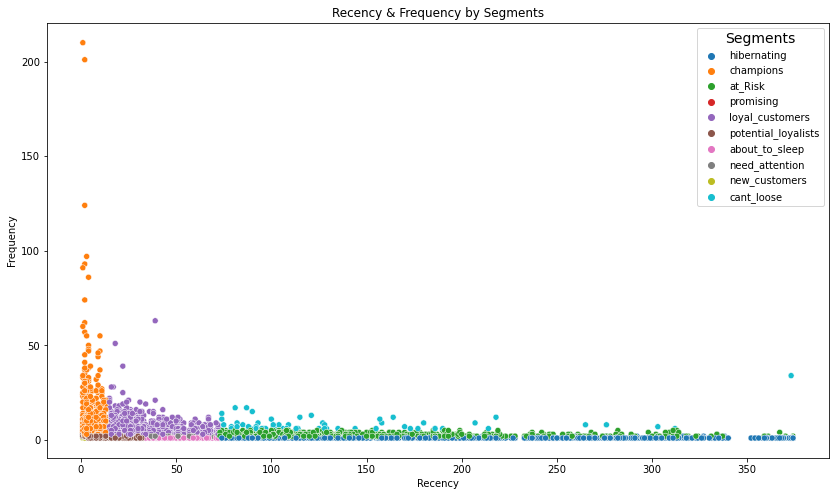

In [85]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=rfm, x="Recency", y = "Frequency", hue="segment")
plt.title("Recency & Frequency by Segments")
plt.legend(title="Segments", title_fontsize=14)
plt.show()

Only `champions` and `loyal` `customer` are more frequent than other segments

### Cohort Analysis

A cohort is a group of people sharing something in common, such as the sign-up date to an app, the month of the first purchase, geographical location, acquisition channel (organic users, coming from performance marketing, etc.) and so on. In Cohort Analysis, we track these groups of users over time, to identify some common patterns or behaviors.

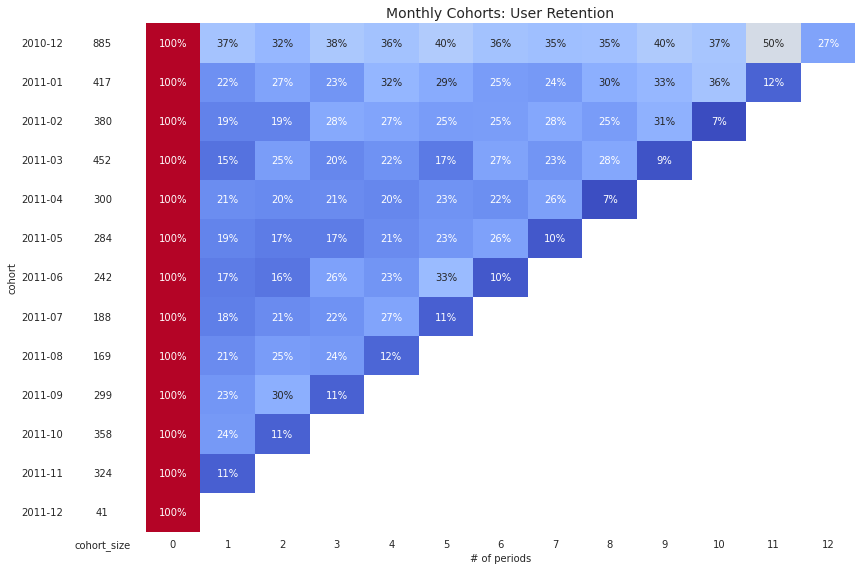

In [86]:
def CohortAnalysis(dataframe):
    
    data = dataframe.copy()
    data = data[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates()
    data['order_month'] = data['InvoiceDate'].dt.to_period('M')
    data['cohort'] = data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
    cohort_data = data.groupby(['cohort', 'order_month']).agg(n_customers=('CustomerID', 'nunique')).reset_index(drop=False)
    cohort_data['period_number'] = (cohort_data.order_month - cohort_data.cohort).apply(attrgetter('n'))
    cohort_pivot = cohort_data.pivot_table(index = 'cohort',
                                           columns = 'period_number',
                                           values = 'n_customers')
    cohort_size = cohort_pivot.iloc[:,0]
    retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

    # visualizing the retention matrix
    with sns.axes_style("white"):
        fig, ax = plt.subplots(1, 2, figsize=(12, 8),
                        sharey=True,
                        gridspec_kw={'width_ratios': [1, 11]})
        sns.heatmap(retention_matrix, 
                    mask = retention_matrix.isnull(), 
                    annot = True,
                    cbar = False,
                    fmt='.0%', 
                    cmap='coolwarm', ax=ax[1])
        ax[1].set_title('Monthly Cohorts: User Retention', fontsize=14)
        ax[1].set(xlabel='# of periods',
                  ylabel='')
        white_cmap = mcolors.ListedColormap(['white'])
        sns.heatmap(pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'}), 
                    annot=True, 
                    cbar = False,
                    fmt='g',
                    cmap=white_cmap,
                    ax=ax[0])
        fig.tight_layout()
 
# creating the plot to display the User's retention     
CohortAnalysis(df)

### Customer Lifetime Value

Customer lifetime value is how much money a customer will bring your brand throughout their entire time as a paying customer.

In [87]:
# finding customers recency, monetary, frequency and total span.
cltv_df = df.groupby('CustomerID').agg({'InvoiceDate': [lambda x: (x.max() - x.min()).days,
                                                        lambda x: (today_date - x.min()).days], 
                                        'InvoiceNo': lambda x: x.nunique(),
                                        'TotalPrice': lambda x: x.sum()})

In [88]:
cltv_df

InvoiceDate            InvoiceNo TotalPrice
            <lambda_0> <lambda_1>  <lambda>   <lambda>
CustomerID                                            
12346                0        326         1      28.08
12347              365        368         7    3877.44
12348              282        359         4     557.57
12349                0         19         1    1336.65
12350                0        311         1     301.90
...                ...        ...       ...        ...
18280                0        278         1     174.50
18281                0        181         1      61.92
18282              118        127         2     150.96
18283              333        338        16    2081.98
18287              158        202         3    1520.23

[4339 rows x 4 columns]

In [89]:
cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
cltv_df.head()

,recency,T,frequency,monetary
CustomerID,,,,
12346,0,326,1,28.08
12347,365,368,7,3877.44
12348,282,359,4,557.57
12349,0,19,1,1336.65
12350,0,311,1,301.90
